In [1]:
include("Create_Sample.jl")
include("MIP_SPLIT.jl")
include("Split.jl")
include("GA.jl")
include("Initial.jl")
include("Mutation.jl")
include("Crossover.jl")
include("Neighborhood.jl")
include("Neighborhood_intra.jl")
include("costs.jl")
include("Draw.jl")
include("Escape.jl")
include("cross_escape.jl")


N_shift1_extensive (generic function with 1 method)

In [3]:
instances = [:eil51, :berlin52, :eil76, :rat99]
LKH3 = [[222.7, 159.6, 124.0, 112.1],[4110.2, 3184.2, 2440.9, 2440.9], [280.9, 196.7, 143.4, 128.2],[690.8, 523.3, 467.0,442.5]]
Ms = [5] #, 3, 5, 7]

best_v = Float64[]
Avg_v = Float64[]
worst_v = Float64[]

count = 0
best_ = 0.0
Avg_ = 0.0
worst_ = 0.0
time_ = 0.0
P = Chromosome[]
best_chrm = Chromosome(Int[], 0.0, 0.0, Tour[])
worst_chrm = Chromosome(Int[], 0.0, 0.0, Tour[])
crossover_functions = [5,7,8]
demands = Int[]
W = 150
for (i,instance) in enumerate(instances)
    for (j,K) in enumerate(Ms)
        count += 1
        T = Read_TSPLIB_instance(instance, 1)
        n = size(T)[1]-2
        tsp = readTSPLIB(instance)
        allNodes = tsp.nodes
        depot = allNodes[1, :]

        Customers = allNodes[2:n+1, :]
        
        demands = ones(Int, n)
        W = 150
        h = 0.3
        popsize = (20,40)
        k_tournament = 2
        num_iter = 2500
        time_limit = Inf
        Mutation_Chance = 0.0
        
        num_runs = 2
        num_nei = 2
        avg = 0.0
        best = Inf
        worst = 0.0
        t1 = time() 
        P = Chromosome[]
        for i=1:num_runs
#             println("run ", i)
            P, roullet = Perform_Genetic_Algorithm(T, demands,K, W, h, popsize, 
                k_tournament, num_iter, time_limit, Mutation_Chance, num_nei, crossover_functions, copy(transpose(Customers)), depot);
#             roullet_ = roullet_ + roullet
            avg += P[1].fitness
            if P[1].fitness < best
                best = P[1].fitness
                best_chrm = P[1]
            end
            if P[1].fitness > worst
                worst = P[1].fitness
                worst_chrm = P[1]
            end
#             if P[1].fitness < 223
#                 break
#             end
        end
        t2 = time()
        println("Results for ", instance, " ,m=", K)
        println("Best: ", round(best, digits = 1), "  Average: ", round(avg/num_runs, digits = 1), 
            "  Worst: ", round(worst, digits = 1), " , run time= ", round((t2-t1)/num_runs, digits=0))
        best_ += 100*(best-LKH3[i][j])/LKH3[i][j]
        worst_ += 100*(worst-LKH3[i][j])/LKH3[i][j]
        Avg_ += 100*(avg/num_runs-LKH3[i][j])/LKH3[i][j]
        time_ += t2-t1
    end
end
push!(best_v, best_/count)
push!(worst_v, worst_/count)
push!(Avg_v, Avg_/count)
println("Results:  Best: ", round(best_/count, digits=1), "  Average: ", round(Avg_/count, digits=1), "  Worst: ", round(worst_/count, digits=1), "   run time: ", round(time_/count, digits=1))
K = Ms[1]

Generation 0 the best objective is: 127.504
Generation 100 the best objective is: 124.88403202107622
Generation 200 the best objective is: 124.88403202107622
Generation 300 the best objective is: 124.88403202107622
Generation 400 the best objective is: 121.20872414293514
Generation 500 the best objective is: 119.94861903593049
Generation 600 the best objective is: 119.94861903593049
Generation 700 the best objective is: 119.94861903593049
Generation 800 the best objective is: 119.94861903593049
Generation 900 the best objective is: 119.94861903593049
Generation 1000 the best objective is: 119.94861903593049
Generation 1100 the best objective is: 119.94861903593049
Generation 1200 the best objective is: 119.94861903593049
Generation 1300 the best objective is: 119.94861903593049
Generation 1400 the best objective is: 119.94861903593049
Generation 1500 the best objective is: 119.94861903593049
Generation 1600 the best objective is: 119.94861903593049
Generation 1700 the best objective is

LoadError: InterruptException:

Tour 1:
47 5 13 23 42 22 6 25 7 30 27 2 35 34 19 28 20 33 29 8 49 15 1 21 31 
10 37 4 48 9 38 32 44 14 36 16 43 41 18 39 40 12 24 17 3 46 11 45 50 26 

cost=442.8822986646737


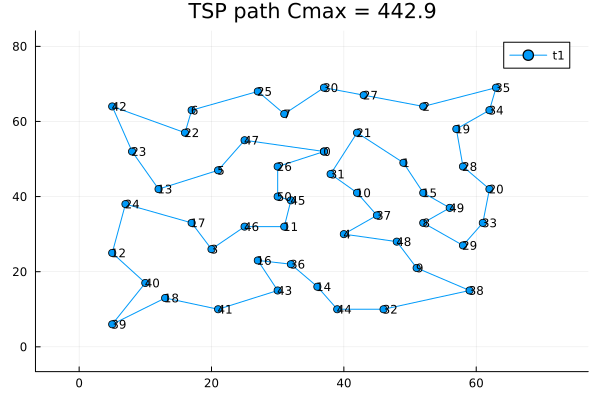

In [3]:
T = Read_TSPLIB_instance(:eil51, 1)
tsp = readTSPLIB(:eil51)
allNodes = tsp.nodes
n_nodes = size(allNodes)[1] - 1
depot = allNodes[1, :]

Customers = allNodes[2:n_nodes+1, :];

b = best_chrm.genes
tours = [Tour(b, find_tour_length(b, T))]
c = Chromosome(b, 0.0, 0.0, tours)
Draw_Solution(c, depot, Customers, "TSP path", find_tour_length(b, T))

Tour 1:
47 5 13 23 42 22 6 25 7 30 27 2 35 34 19 28 20 33 29 8 49 15 1 21 
cost=221.59805875781126
Tour 2:
31 10 37 4 48 9 38 32 44 14 36 16 43 41 18 39 40 12 24 17 3 46 11 45 50 
26 
cost=222.73337033830651


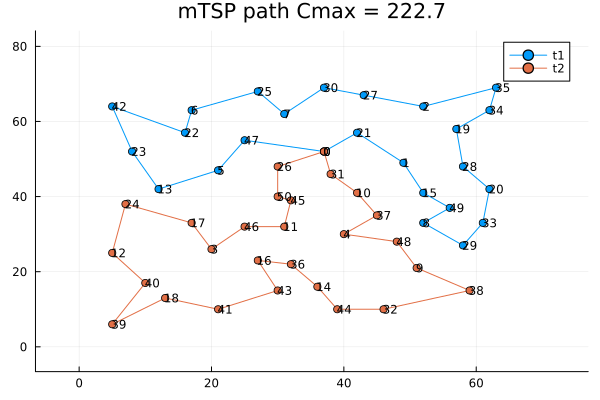

In [4]:
Draw_Solution(best_chrm, depot, Customers, "mTSP path" , best_chrm.fitness)

Tour 1:
21 7 25 30 27 2 35 34 19 28 1 15 49 20 33 29 8 48 9 38 32 44 14 43 41 
18 39 40 12 24 13 23 42 6 22 47 5 26 50 45 11 46 17 3 16 36 4 37 10 31 

cost=428.871


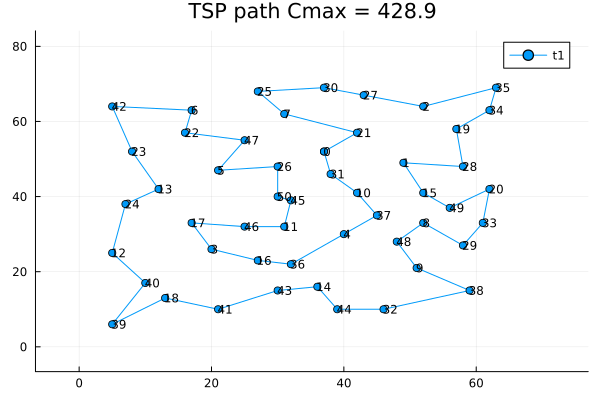

In [5]:
tsp_tour, l = find_tsp_tour1(T[1:n_nodes+1, 1:n_nodes+1])

tours = [Tour(tsp_tour, l)]
c = Chromosome(tsp_tour, 0.0, 0.0, tours)
Draw_Solution(c, depot, Customers, "TSP path", l)

Tour 1:
21 7 25 30 27 2 35 34 19 28 1 15 49 20 33 29 8 48 9 38 32 44 14 43 41 

cost=255.80688778171321
Tour 2:
18 39 40 12 24 13 23 42 6 22 47 5 26 50 45 11 46 17 3 16 36 4 37 10 31 

cost=255.25828754091293


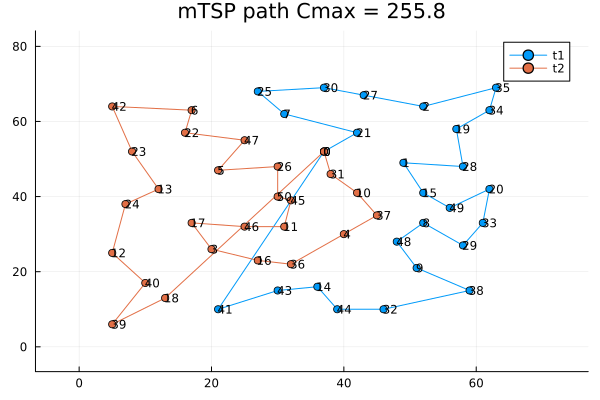

In [6]:
K = 2
obj, trips = SPLIT(T, demands, K, W, tsp_tour)
offspring = Chromosome(tsp_tour, obj, 0.0, trips)
Draw_Solution(offspring, depot, Customers, "mTSP path", obj)

In [131]:
include("GA.jl")
include("Initial.jl")
include("Neighborhood.jl")
include("costs.jl")
# include("Create_Sample.jl")
using Distances
dir_name = "set1"
sample_name = "mtsp150_3"
m, T, depot, customers = read_data(dir_name, sample_name)
n = size(T)[1]-2
demands = ones(Int, n)
W = 1000
h = 0.3
popsize = (20,20)
k_tournament = 6
num_iter = 10000000
time_limit = n*240/100
Mutation_Chance = 0.0
num_runs = 10
num_nei = 2
avg = 0.0
best = Inf
worst = 0.0
crossover_functions = [5,7,8]
best_chrm = Chromosome(Int[], 0.0, 0.0, Tour[])
worst_chrm = Chromosome(Int[], 0.0, 0.0, Tour[])

t1 = time()
for i=1:num_runs
    P, roullet = Perform_Genetic_Algorithm(T, demands,m, W, h, popsize, 
                k_tournament, num_iter, time_limit, Mutation_Chance, num_nei, crossover_functions, customers, depot);
#             roullet_ = roullet_ + roullet
    avg += P[1].fitness
    if P[1].fitness < best
        best = P[1].fitness
        best_chrm = P[1]
    end
    if P[1].fitness > worst
        worst = P[1].fitness
        worst_chrm = P[1]
    end
end
t2 = time()
println("Results for ", sample_name, " ,m=", m)
println("Best: ", round(best, digits = 1), "  Average: ", round(avg/num_runs, digits = 1), 
    "  Worst: ", round(worst, digits = 1), " , run time= ", round((t2-t1)/num_runs, digits=0))

Generation 0 the best objective is: 14749.854256342529
Generation 100 the best objective is: 13630.273252981237
Generation 200 the best objective is: 13489.4522382099
Generation 300 the best objective is: 13466.037802054914
Generation 400 the best objective is: 13466.037802054914
Generation 500 the best objective is: 13334.070175656683
Generation 600 the best objective is: 13334.070175656683
Generation 700 the best objective is: 13334.070175656683
Generation 800 the best objective is: 13237.239266101182
Generation 900 the best objective is: 13237.239266101182
Generation 1000 the best objective is: 13226.792235779343
Generation 1100 the best objective is: 13208.505106528717
Generation 1200 the best objective is: 13208.505106528717
Generation 1300 the best objective is: 13208.505106528717
Generation 1400 the best objective is: 13208.505106528717
Generation 1500 the best objective is: 13208.505106528717
Generation 1600 the best objective is: 13208.505106528717
Generation 1700 the best obj

LoadError: InterruptException:

In [77]:
include("Create_Sample.jl")
m, T, depot, customers = read_data(dir_name, sample_name);


Tour 1:
10 37 48 9 38 32 44 14 36 4 31 
cost=112.3914774043133
Tour 2:
35 34 19 28 20 33 29 8 49 15 1 
cost=117.95515721426133
Tour 3:
13 24 12 41 43 16 11 45 
cost=118.1015546876828
Tour 4:
26 5 17 40 39 18 3 46 50 
cost=117.75680150554565
Tour 5:
21 2 27 30 7 25 6 42 23 22 47 
cost=118.13375254600861


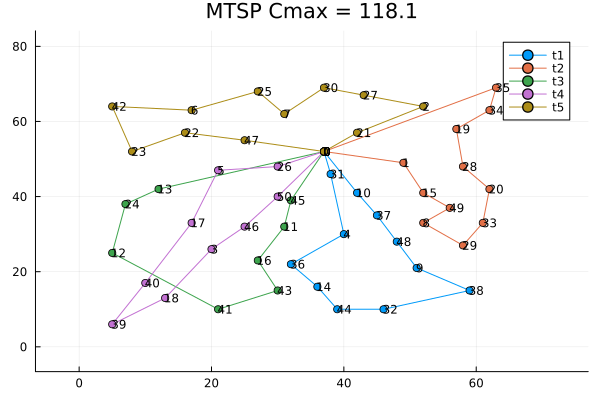

In [128]:
Draw_Solution(best_chrm, Float64.(depot), copy(transpose(customers)), "MTSP", best_chrm.fitness)

In [6]:
chrm = deepcopy(worst_chrm)

Chromosome([21, 30, 27, 2, 35, 34, 19, 28, 20, 33  …  24, 13, 5, 47, 26, 17, 12, 40, 39, 18], 119.94861903593045, 97.25229081438977, Tour[Tour([21, 30, 27, 2, 35, 34, 19, 28, 20, 33, 49, 15], 118.09674946331543), Tour([50, 46, 3, 41, 43, 44, 14, 36, 16, 11, 45, 31], 118.99971321954128), Tour([10, 37, 4, 48, 9, 32, 38, 29, 8, 1], 116.9107497518209), Tour([7, 25, 6, 22, 42, 23, 24, 13, 5, 47, 26], 117.88710859705242), Tour([17, 12, 40, 39, 18], 119.94861903593045)])